In [14]:
import numpy as np
import random

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

In [15]:
# Load digits from Sklearn 
dig_data = datasets.load_digits()

print(dig_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [16]:
# DataType of imported dataset 
print(type(dig_data))

# no. of dig_data image cases
print("Total Cases : ", len(dig_data.images))

# Keys in dig_data dataset 
# [Bunch objects are similar to dictionaries]
# Here each kay has a bunch of values linked to it
print(dig_data.keys())

# Targets of dig_data
# the .target attribute provides the target value for all the
# data entries of the dig_data dataset
print(dig_data.target)

#The Allowed targets are
print("Allowed targets : ", *dig_data.target_names)

<class 'sklearn.utils.Bunch'>
Total Cases :  1797
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[0 1 2 ... 8 9 8]
Allowed targets :  0 1 2 3 4 5 6 7 8 9


In [17]:
# Image attribute values be like
dig_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Text(0.5, 1.0, 'Hand Written Digit')

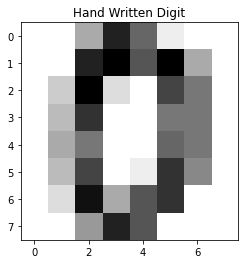

In [18]:
# Visualization of first Image
plt.figure(figsize=(4, 4))
plt.imshow(dig_data.images[0], interpolation = "nearest", cmap = plt.cm.gray_r)
plt.title("Hand Written Digit")

In [19]:
# Reshape the image data in an accessible manner
digits = dig_data.images.reshape((len(dig_data.images), -1))

# shape of digits dataset
digits.shape

(1797, 64)

In [20]:
# Split the data into training set and testing set in [99:1 ratio] 
x_train, x_test, y_train, y_test = train_test_split(digits, dig_data.target, 
                                        train_size = 0.7, random_state=1)

In [21]:
# Create a GridSearch to find the best_parameters for the good accuracy
GSV = GridSearchCV(svm.SVC(kernel = "rbf"), 
        param_grid = {"gamma" : [0.001, 0.01, 0.1, 1], "C" : [1.0, 1.0, 100.0]}, cv=3)

GSV.fit(x_train, y_train)

GSV.cv_results_

{'mean_fit_time': array([0.06834364, 0.18324971, 0.18793774, 0.15844655, 0.06772232,
        0.18329104, 0.18465281, 0.15622473, 0.06693848, 0.18403021,
        0.1891764 , 0.16541274]),
 'mean_score_time': array([0.02707561, 0.04457045, 0.04616833, 0.04119205, 0.02703015,
        0.04601566, 0.04489374, 0.04047338, 0.02680612, 0.04474274,
        0.04583557, 0.0400273 ]),
 'mean_test_score': array([0.98647574, 0.69689737, 0.10898966, 0.10739857, 0.98647574,
        0.69689737, 0.10898966, 0.10739857, 0.98806683, 0.72315036,
        0.10898966, 0.10739857]),
 'param_C': masked_array(data=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 100.0, 100.0,
                    100.0, 100.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 0.01, 0.1, 1, 0.001, 0.01, 0.1, 1, 0.001, 0.01,
                    0.1, 1],
              mask=

In [22]:
# Select the best parameters 
# one can also look through the rank_test_score for more insights
GSV.best_params_

{'C': 100.0, 'gamma': 0.001}

In [23]:
# Now using best parameters create a SVC mode
model = svm.SVC(C = 10.0, gamma = 0.001)
# Fit the model with training dataset
model.fit(x_train, y_train)

# Model score
score = model.score(x_test, y_test)
print(score)

# Acuraccy metrics
accuracy_score(y_test, model.predict(x_test))

0.9907407407407407


0.9907407407407407

In [24]:
# Classification report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.98      1.00      0.99        49
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        61
           5       0.96      0.98      0.97        47
           6       1.00      1.00      1.00        51
           7       1.00      0.98      0.99        57
           8       1.00      0.98      0.99        46
           9       0.96      0.96      0.96        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [25]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(x_test))

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 55]])

In [26]:
# Now lets create a model with C = 100.0
# ususally the best parameters of gridScearch varies
# As random splitting takes place the 
# train and test data changes every time we run it

model = svm.SVC(C = 100.0, gamma = 0.001)
model.fit(x_train, y_train)

print(model.score(x_test, y_test))
print("Accuracy -", accuracy_score(y_test, model.predict(x_test)))

print(classification_report(y_test, model.predict(x_test)))

0.9907407407407407
Accuracy - 0.9907407407407407
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.98      1.00      0.99        49
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        61
           5       0.96      0.98      0.97        47
           6       1.00      1.00      1.00        51
           7       1.00      0.98      0.99        57
           8       1.00      0.98      0.99        46
           9       0.96      0.96      0.96        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [27]:
# Confusion matrix for C = 100
confusion_matrix(y_test, model.predict(x_test))

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 55]])

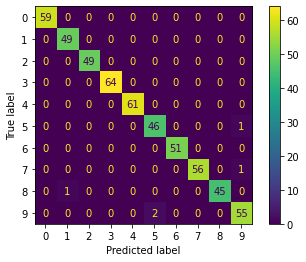

In [28]:
plot_confusion_matrix(model, x_test, y_test)